# 2. Exploratory data analysis

In this section we explored and analyze the dataset with different methods to see the missing data points for cleaning

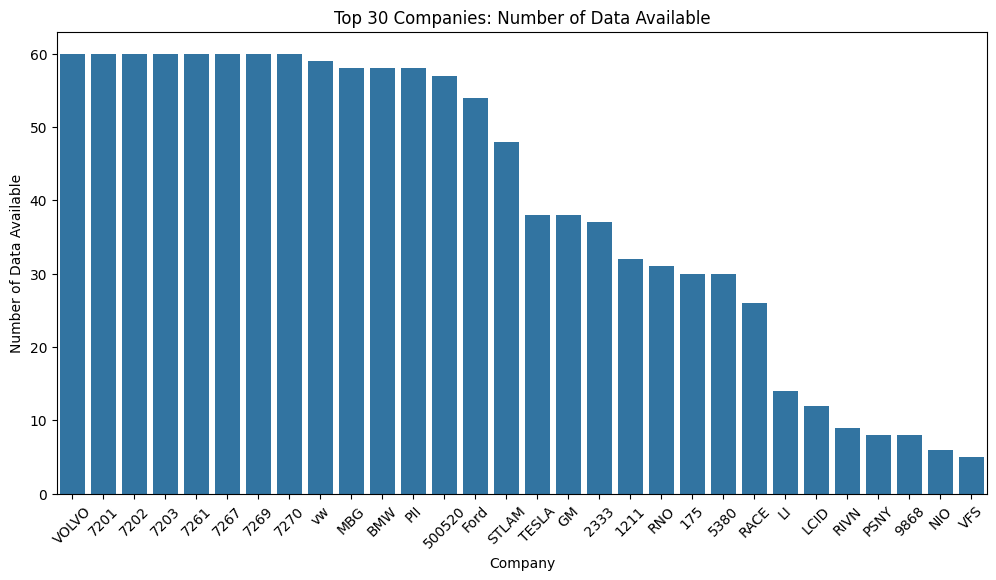

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/combined_data.csv')

# Count non-null values for each company
data_available = df.groupby('Stock').count().iloc[:, 0]

# Specify the number of top companies to visualize
top_n = 30  # You can adjust this number based on your preference

# Select top N companies with the most available data
top_companies = data_available.sort_values(ascending=False).head(top_n)

# Bar chart to visualize the number of data available for each top company
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title(f'Top {top_n} Companies: Number of Data Available')
plt.xlabel('Company')
plt.ylabel('Number of Data Available')
plt.xticks(rotation=45)
plt.show()


Some companies have more reports than others

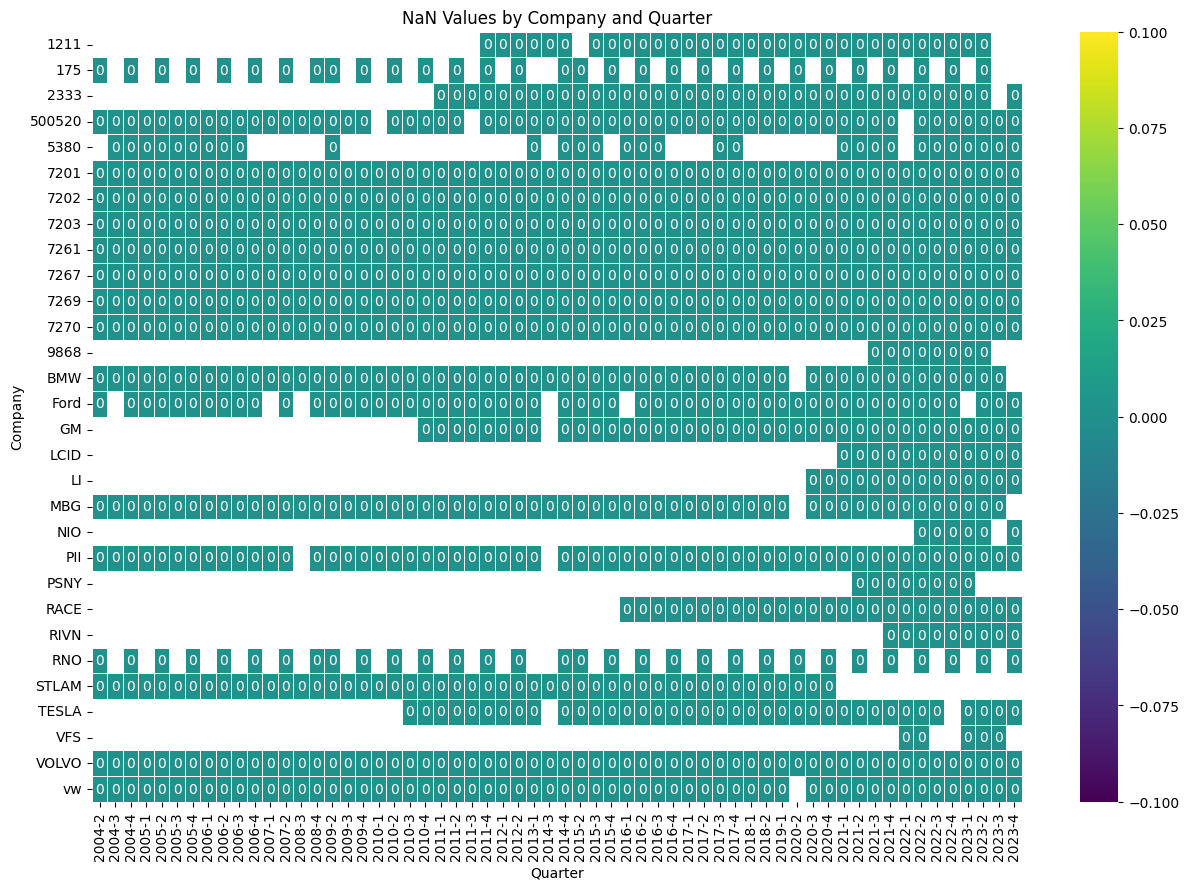

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/combined_data.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and quarter from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Pivot the dataframe to get NaN counts for each company and quarter
nan_counts_pivot = df.pivot_table(index='Stock', columns=['Year', 'Quarter'], values='Date', aggfunc=lambda x: x.isnull().sum())

# Create a heatmap to visualize NaN counts for each company and quarter
plt.figure(figsize=(15, 10))
sns.heatmap(nan_counts_pivot, cmap='viridis', cbar=True, annot=True, fmt='g', linewidths=.5)
plt.title('NaN Values by Company and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Company')
plt.show()


Some missing datapoints in reports 

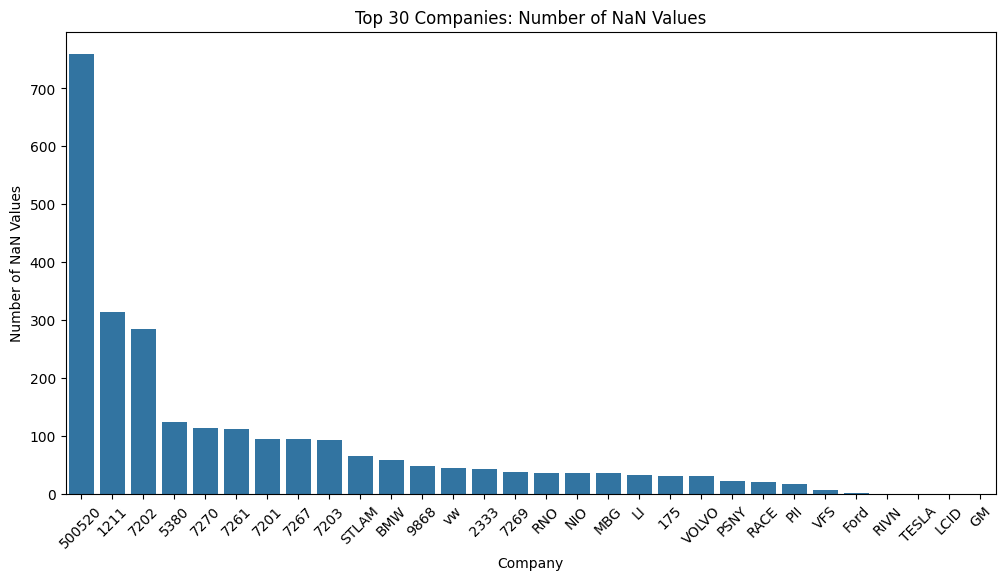

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/combined_data.csv')

# Count NaN values for each company
nan_counts = df.groupby('Stock').apply(lambda x: x.isnull().sum())

# Sum NaN counts across columns to get total NaN count for each company
nan_counts['Total NaN'] = nan_counts.sum(axis=1)

# Specify the number of top companies to visualize
top_n = 30  # You can adjust this number based on your preference

# Select top N companies with the most NaN values
top_nan_companies = nan_counts['Total NaN'].sort_values(ascending=False).head(top_n)

# Bar chart to visualize the number of NaN values for each top company
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nan_companies.index, y=top_nan_companies.values)
plt.title(f'Top {top_n} Companies: Number of NaN Values')
plt.xlabel('Company')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.show()


We can see which companies has most missing datapoints ( Mahindra & Mahindra Ltd. Stock 500520) while Ford ,RIVN,TESLA ,LCID and GM have no missing values

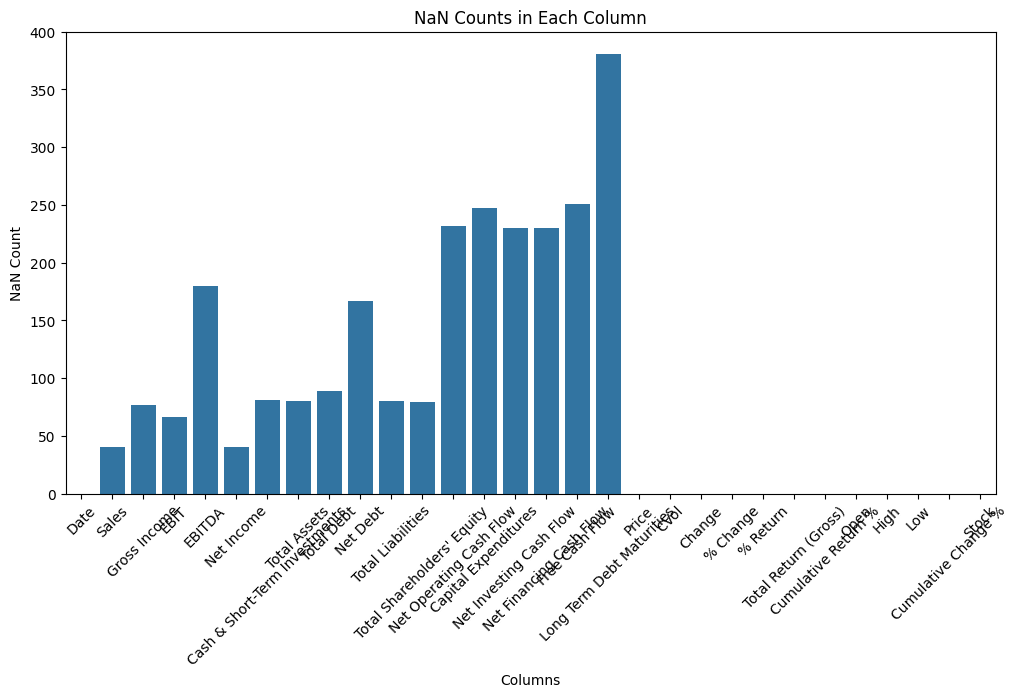

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/combined_data.csv')

# Count NaN values in each column
nan_counts = df.isnull().sum()

# Bar chart to visualize NaN counts
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=45)
plt.title('NaN Counts in Each Column')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.show()

Moreover , some features data points also missing but the numbers relatively small as total data points in dataset is 10.000 data points 

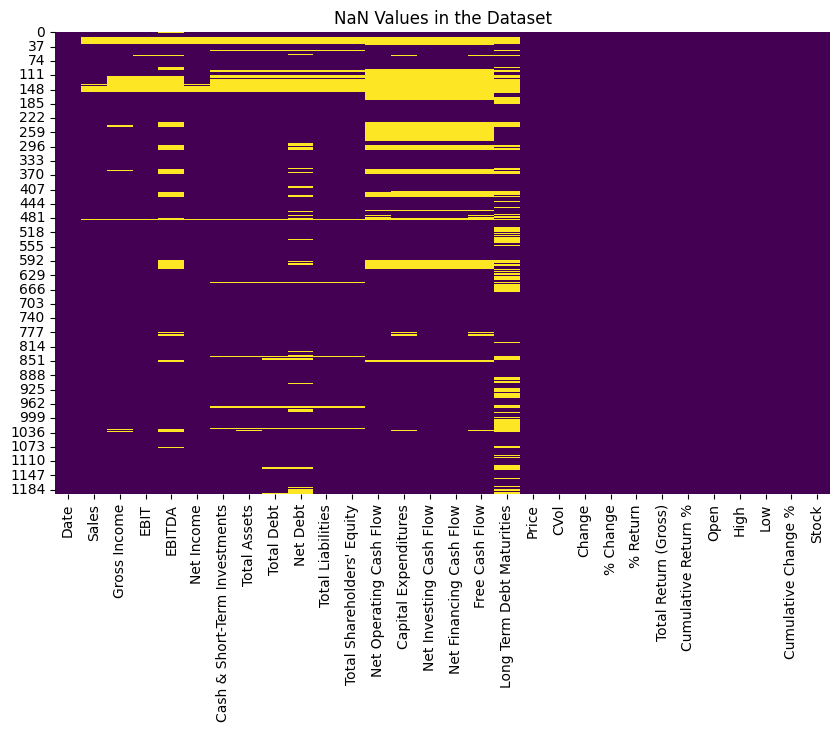

In [8]:
# Heatmap to visualize NaN values in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('NaN Values in the Dataset')
plt.show()

Here we can see the missing datapints in the 1184 repots and the features 